In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data/shopping_trends_updated.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [4]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [5]:
df.shape

(3900, 18)

In [6]:
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

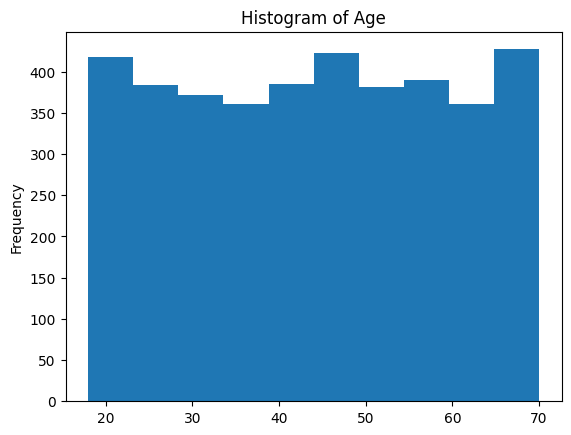

In [8]:
df["Age"].plot(kind = "hist")
plt.title("Histogram of Age")
plt.show()

In [9]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

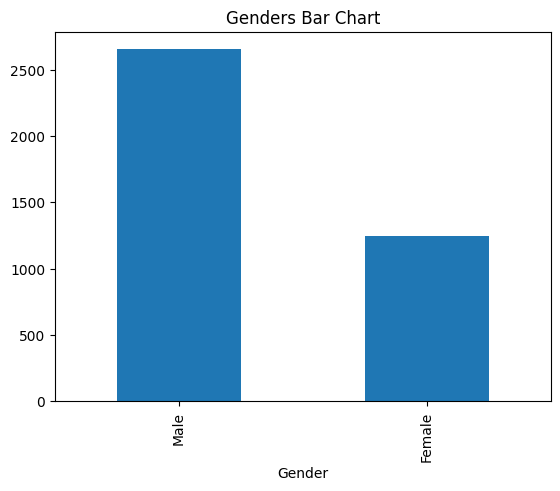

In [10]:
df["Gender"].value_counts().plot(kind = "bar")
plt.title("Genders Bar Chart")
plt.show()

In [11]:
df.groupby("Category")["Purchase Amount (USD)"].mean().sort_values(ascending = False)

Category
Footwear       60.255426
Clothing       60.025331
Accessories    59.838710
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

In [12]:
df = df.sort_values("Review Rating", ascending = False)

In [13]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
776,777,49,Male,Shirt,Clothing,60,Alabama,M,Maroon,Spring,5.0,Yes,Standard,Yes,Yes,8,Venmo,Every 3 Months
1664,1665,19,Male,Handbag,Accessories,53,Minnesota,M,Purple,Spring,5.0,No,Next Day Air,Yes,Yes,35,PayPal,Weekly
1277,1278,19,Male,Blouse,Clothing,97,Rhode Island,L,Green,Spring,5.0,No,Express,Yes,Yes,5,Venmo,Quarterly
2632,2633,24,Male,Scarf,Accessories,27,Alaska,M,Black,Fall,5.0,No,Next Day Air,No,No,14,Cash,Annually
965,966,43,Male,Boots,Footwear,55,Delaware,L,Black,Spring,5.0,Yes,Store Pickup,Yes,Yes,10,Credit Card,Annually


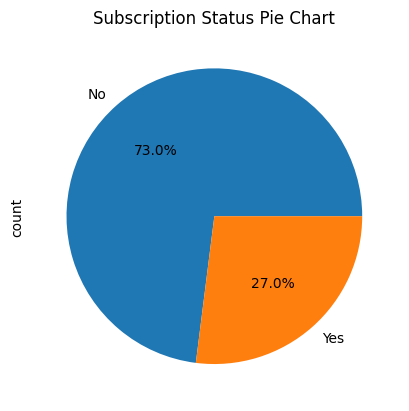

In [14]:
df["Subscription Status"].value_counts().plot(kind = "pie", autopct='%1.1f%%')
plt.title("Subscription Status Pie Chart")
plt.show()

In [15]:
df["Color"].value_counts().head(6)

Color
Olive     177
Yellow    174
Silver    173
Teal      172
Green     169
Black     167
Name: count, dtype: int64

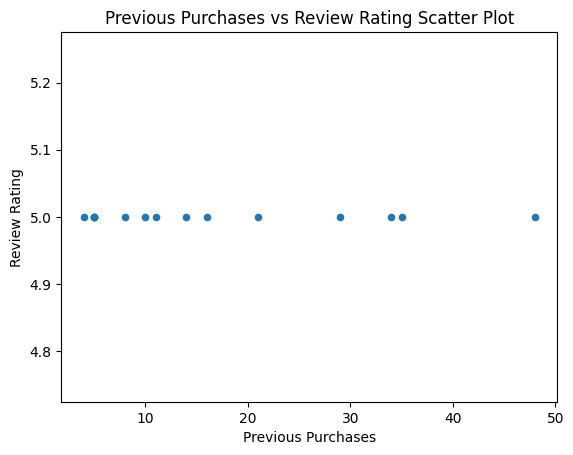

In [16]:
df.head(15).plot(x = "Previous Purchases", y = "Review Rating", kind = "scatter")
plt.title("Previous Purchases vs Review Rating Scatter Plot")
plt.show()

In [17]:
df.groupby("Season")["Purchase Amount (USD)"].sum()   

Season
Fall      60018
Spring    58679
Summer    55777
Winter    58607
Name: Purchase Amount (USD), dtype: int64

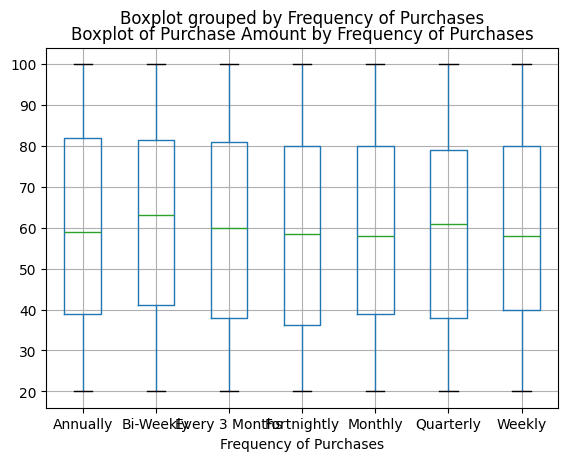

In [18]:
df.boxplot(column = "Purchase Amount (USD)", by = "Frequency of Purchases")
plt.title("Boxplot of Purchase Amount by Frequency of Purchases")
plt.show()

In [19]:
df["Payment Method"].value_counts()

Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

In [20]:
pd.pivot_table(df, index = "Location", columns = "Item Purchased", values = "Purchase Amount (USD)", aggfunc = np.mean)

/var/folders/7h/hhfb2zp15xn9_lf52_bb379h0000gn/T/ipykernel_10460/73687104.py:1: FutureWarning: The provided callable <function mean at 0x103e6dfc0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(df, index = "Location", columns = "Item Purchased", values = "Purchase Amount (USD)", aggfunc = np.mean)


Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Location,,,,,,,,,,,,,,,,,,,,,
Alabama,74.000000,26.500000,52.000000,73.666667,54.500000,55.200000,85.000000,57.666667,76.000000,53.000000,...,75.333333,48.200000,54.333333,49.000000,68.666667,79.500000,93.500000,62.666667,40.500000,52.500000
Alaska,74.600000,76.750000,67.500000,56.000000,45.500000,74.500000,66.333333,46.000000,52.666667,56.500000,...,45.000000,59.500000,80.000000,76.666667,87.333333,73.333333,74.250000,83.000000,50.333333,56.750000
Arizona,48.600000,84.500000,61.000000,NaN,65.333333,71.000000,87.000000,58.666667,87.000000,66.666667,...,53.500000,80.000000,87.000000,46.000000,68.500000,78.500000,61.000000,66.000000,70.400000,62.000000
Arkansas,90.000000,55.000000,66.000000,50.000000,54.250000,62.800000,64.333333,50.000000,35.000000,55.250000,...,67.500000,59.000000,59.500000,95.000000,44.500000,69.000000,60.500000,56.000000,71.500000,52.000000
California,57.400000,61.666667,39.500000,62.500000,55.000000,58.428571,53.000000,65.250000,49.000000,56.000000,...,54.500000,42.800000,NaN,63.333333,56.000000,73.000000,83.000000,69.400000,42.000000,69.000000
Colorado,57.000000,68.500000,55.000000,NaN,46.000000,39.750000,64.500000,51.250000,61.333333,50.500000,...,68.000000,64.500000,67.500000,95.000000,41.200000,53.500000,NaN,34.000000,58.000000,59.000000
Connecticut,60.000000,47.666667,67.400000,64.250000,44.500000,65.000000,63.000000,53.500000,22.000000,63.000000,...,68.250000,62.333333,51.750000,59.500000,54.000000,NaN,61.000000,43.000000,NaN,39.000000
Delaware,33.000000,41.500000,42.200000,44.500000,57.500000,46.000000,72.200000,51.000000,57.400000,79.333333,...,54.000000,45.333333,58.200000,43.000000,66.000000,39.500000,80.000000,45.500000,35.000000,66.666667
Florida,59.000000,94.000000,31.000000,51.500000,51.166667,48.500000,51.666667,67.000000,54.000000,64.250000,...,58.500000,66.333333,26.000000,89.500000,44.500000,64.000000,33.500000,59.000000,56.000000,56.000000


In [21]:
df.groupby("Size")["Purchase Amount (USD)"].mean()

Size
L     58.563153
M     59.924217
S     61.037707
XL    60.090909
Name: Purchase Amount (USD), dtype: float64

In [24]:
df.groupby("Payment Method")["Purchase Amount (USD)"].sum()

Payment Method
Bank Transfer    36544
Cash             40002
Credit Card      40310
Debit Card       38742
PayPal           40109
Venmo            37374
Name: Purchase Amount (USD), dtype: int64

In [26]:
df.groupby("Discount Applied")["Review Rating"].mean()

Discount Applied
No     3.757715
Yes    3.739654
Name: Review Rating, dtype: float64

In [28]:
df.groupby("Color")["Category"].value_counts()

Color   Category   
Beige   Clothing       65
        Accessories    44
        Footwear       24
        Outerwear      14
Black   Clothing       81
                       ..
White   Outerwear      15
Yellow  Clothing       75
        Accessories    56
        Footwear       30
        Outerwear      13
Name: count, Length: 100, dtype: int64

In [30]:
df.groupby("Frequency of Purchases")["Previous Purchases"].median()

Frequency of Purchases
Annually          24.0
Bi-Weekly         24.0
Every 3 Months    24.0
Fortnightly       26.0
Monthly           25.0
Quarterly         28.0
Weekly            26.0
Name: Previous Purchases, dtype: float64

In [31]:
df.groupby("Season")["Review Rating"].mean()

Season
Fall      3.729949
Spring    3.790591
Summer    3.725654
Winter    3.752111
Name: Review Rating, dtype: float64

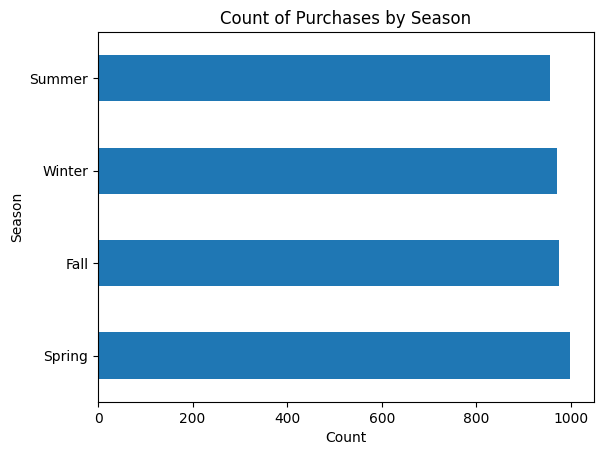

In [33]:
df["Season"].value_counts().plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("Season")
plt.title("Count of Purchases by Season")
plt.show()

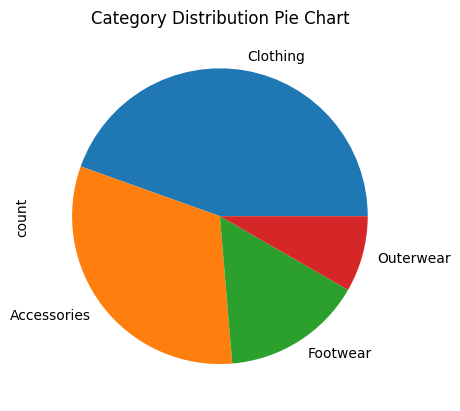

In [34]:
df["Category"].value_counts().plot(kind = "pie")
plt.title("Category Distribution Pie Chart")
plt.show()

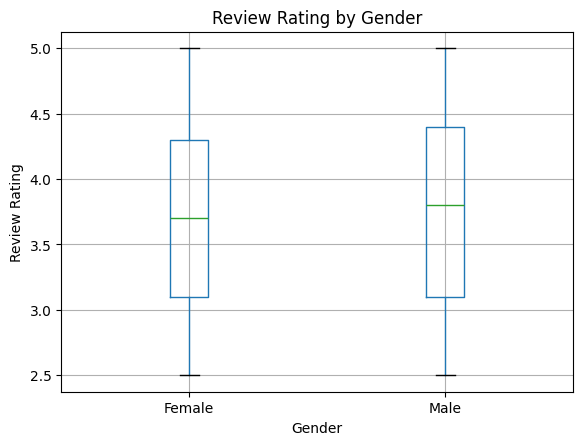

In [ ]:
df.boxplot(column = "Review Rating", by = "Gender")
plt.title("Review Rating by Gender")
plt.suptitle("")  
plt.xlabel("Gender")
plt.ylabel("Review Rating")
plt.show()

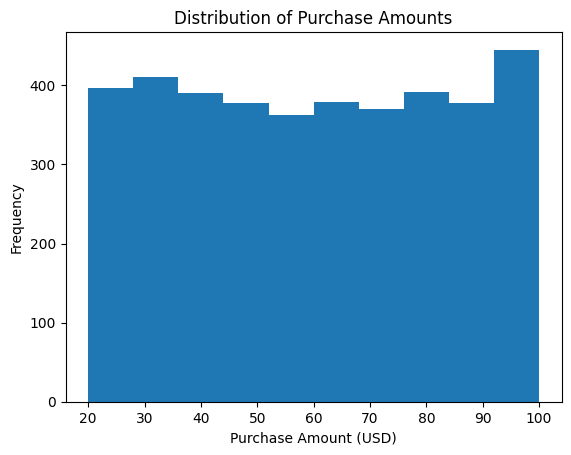

In [39]:
df["Purchase Amount (USD)"].plot(kind = "hist", bins = 10)
plt.title("Distribution of Purchase Amounts")
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Frequency")
plt.show()

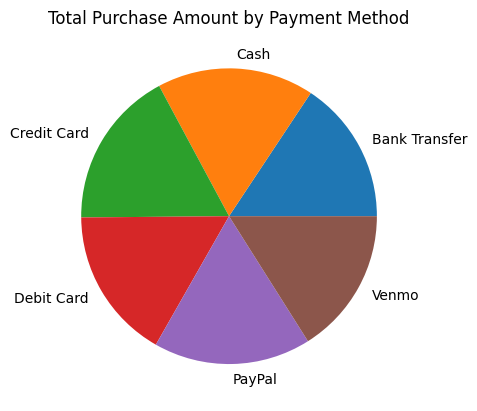

In [41]:
df.groupby("Payment Method")["Purchase Amount (USD)"].sum().plot(kind = "pie")
plt.title("Total Purchase Amount by Payment Method")
plt.ylabel("")
plt.show()

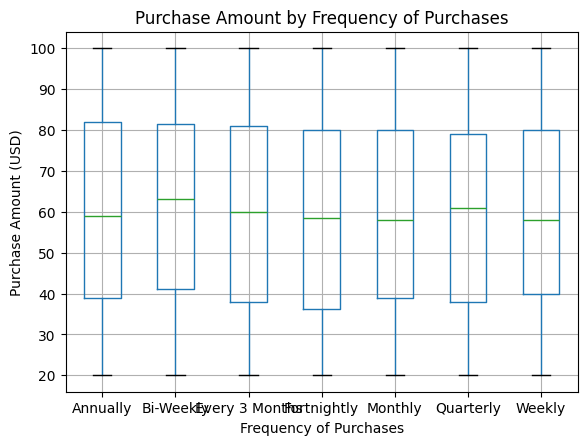

In [42]:
df.boxplot(column = "Purchase Amount (USD)", by = "Frequency of Purchases")
plt.title("Purchase Amount by Frequency of Purchases")
plt.suptitle("")  
plt.xlabel("Frequency of Purchases")
plt.ylabel("Purchase Amount (USD)")
plt.show()

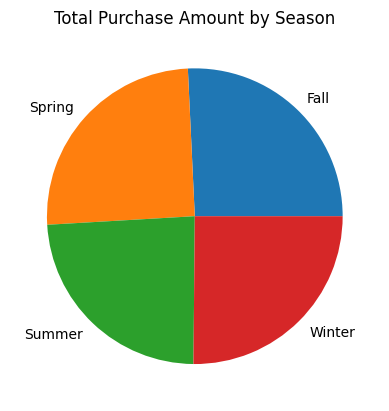

In [44]:
df.groupby("Season")["Purchase Amount (USD)"].sum().plot(kind = "pie")
plt.title("Total Purchase Amount by Season")
plt.ylabel("")
plt.xlabel("")
plt.show()